<a href="https://colab.research.google.com/github/MEDINI7/ds_kopparapu_medini/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trader Behavior vs Market Sentiment Analysis



In [1]:
!git clone https://github.com/MEDINI7/ds_kopparapu_medini.git
%cd ds_kopparapu_medini

fatal: destination path 'ds_kopparapu_medini' already exists and is not an empty directory.
/content/ds_kopparapu_medini


Imports and setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use("default")
pd.set_option("display.max_columns", None)

os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

Loading the Datasets.

*   Here we load the trade data and the sentiment data and quickly check that both files have been read correctly.



In [3]:
trades = pd.read_csv("csv_files/historical_data.csv")
sentiment = pd.read_csv("csv_files/fear_greed_index.csv")

print("Trades shape:", trades.shape)
print("Sentiment shape:", sentiment.shape)

trades.head(), sentiment.head()

Trades shape: (211224, 16)
Sentiment shape: (2644, 4)


(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash     Order ID  \
 0      

Previewing the data

*   This step is just to see what columns are present in both datasets.



In [4]:
print("Trades columns:")
print(trades.columns)

print("\nSentiment columns:")
print(sentiment.columns)


Trades columns:
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

Sentiment columns:
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


Viewing of rows

In [5]:
print("Trades shape:", trades.shape)
print("Sentiment shape:", sentiment.shape)


Trades shape: (211224, 16)
Sentiment shape: (2644, 4)


Data cleaning and preprocessing

*   Here we fix the date formats, standardize the sentiment labels, keep only the needed columns, and remove trades with missing values so the data is ready for analysis.



In [6]:
# Converting trade timestamp to datetime
trades["Timestamp"] = pd.to_datetime(trades["Timestamp"], unit="ms", errors="coerce")

# Creating date column
trades["date"] = trades["Timestamp"].dt.date

# Converting sentiment date to datetime
sentiment["date"] = pd.to_datetime(sentiment["date"], errors="coerce").dt.date

# Normalizing sentiment labels
sentiment["classification"] = sentiment["classification"].str.lower()

# Keeping only required sentiment columns
sentiment_clean = sentiment[["date", "classification"]]

# Droping of the trades with missing PnL or timestamp
trades_clean = trades.dropna(subset=["Closed PnL", "date"])

print("Trades clean shape:", trades_clean.shape)
print("Sentiment clean shape:", sentiment_clean.shape)

trades_clean.head(), sentiment_clean.head()


Trades clean shape: (211224, 17)
Sentiment clean shape: (2644, 2)


(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash     Order ID  \
 0      

Combining trade data with market sentiment

*   In this step, we join both datasets on the date column to link each trade with its market sentiment.



In [7]:
df = trades_clean.merge(sentiment_clean, on="date", how="inner")

print("Merged shape:", df.shape)

df.to_csv("csv_files/merged_data.csv", index=False)

df.head()

Merged shape: (184263, 18)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,greed


Creating a Win/Loss Indicator

*   Here we create a simple flag to mark each trade as a win or a loss based on whether the PnL is positive, which will help us calculate win rates later.



In [8]:
# Create win/loss flag
df["is_win"] = df["Closed PnL"] > 0

# Basic sanity check
df["is_win"].value_counts(normalize=True)


,proportion
is_win,
False,0.57965
True,0.42035


Daily Performance Summary

*   In this step, we summarize the trades at a daily level to make the analysis easier.



In [9]:
daily = df.groupby(["date", "classification"]).agg(
    total_pnl=("Closed PnL", "sum"),
    avg_pnl=("Closed PnL", "mean"),
    trade_count=("Closed PnL", "count"),
    win_rate=("is_win", "mean"),
    avg_fee=("Fee", "mean"),
    avg_size_usd=("Size USD", "mean")
).reset_index()

daily.head()


,date,classification,total_pnl,avg_pnl,trade_count,win_rate,avg_fee,avg_size_usd
0,2023-03-28,greed,0.000000e+00,0.000000,3,0.000000,0.000000,159.000000
1,2023-11-14,greed,1.555034e+02,0.148807,1045,0.274641,2.674230,11057.827522
2,2024-03-09,extreme greed,1.769655e+05,25.418772,6962,0.490089,0.978567,5660.265764
3,2024-07-03,neutral,1.587424e+05,22.229713,7141,0.317182,1.224461,3058.848110
4,2024-10-27,greed,3.189461e+06,90.504272,35241,0.451605,0.611205,2949.625864


Saving the summarized daily performance metrics to a CSV file(daily_metrics.csv)

In [10]:
daily.to_csv("csv_files/daily_metrics.csv", index=False)

Comparing profit and loss across different market moods

*   The first plot shows the full PnL distribution including extreme outliers. Since these outliers compress the main data into a narrow band around zero, a second clipped plot is shown to better visualize the typical trade behavior.



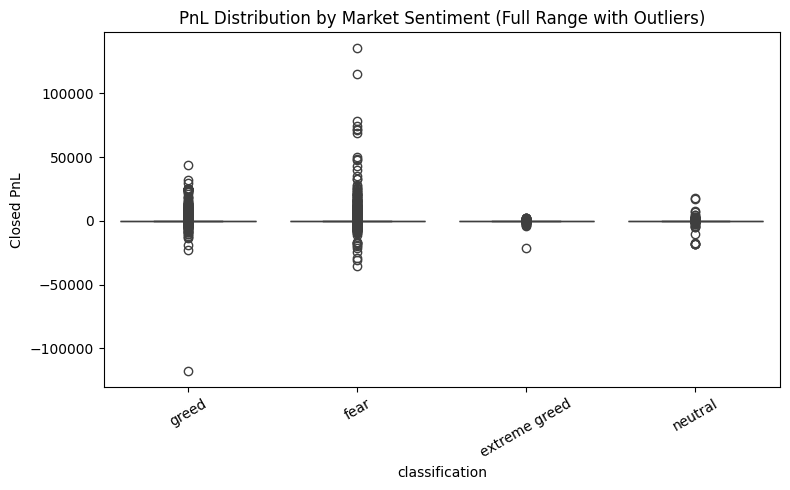

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="classification", y="Closed PnL")
plt.title("PnL Distribution by Market Sentiment (Full Range with Outliers)")
plt.xticks(rotation=30)

plt.tight_layout()
plt.savefig("outputs/pnl_distribution_by_sentiment_full.png", dpi=150)
plt.show()

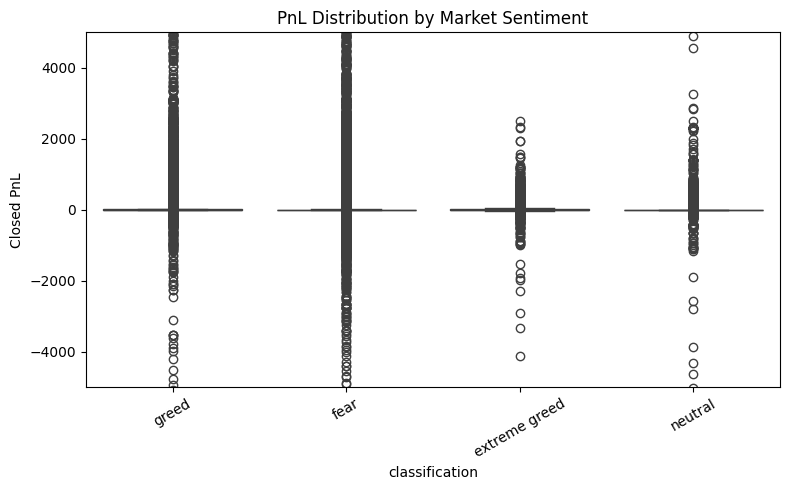

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="classification", y="Closed PnL")
plt.ylim(-5000, 5000)
plt.title("PnL Distribution by Market Sentiment")
plt.xticks(rotation=30)

plt.tight_layout()
plt.savefig("outputs/pnl_distribution_by_sentiment_zoomed.png", dpi=150)
plt.show()

Trading activity across different market conditions

*   This step shows what percentage of trades fall under each market sentiment category.



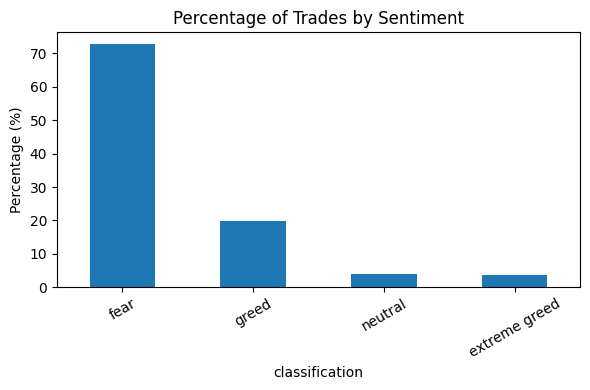

In [13]:
counts = df["classification"].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
counts.plot(kind="bar")
plt.title("Percentage of Trades by Sentiment")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=30)

plt.tight_layout()
plt.savefig("outputs/trade_percentage_by_sentiment.png", dpi=150)
plt.show()

Summary of trading performance by market sentiment

*   Here we summarize key performance metrics such as average PnL, risk, win rate, and trading activity for each market sentiment category.



In [14]:
summary = df.groupby("classification").agg(
    mean_pnl=("Closed PnL", "mean"),
    median_pnl=("Closed PnL", "median"),
    std_pnl=("Closed PnL", "std"),
    win_rate=("is_win", "mean"),
    avg_fee=("Fee", "mean"),
    avg_size_usd=("Size USD", "mean"),
    trade_count=("Closed PnL", "count")
)

summary


,mean_pnl,median_pnl,std_pnl,win_rate,avg_fee,avg_size_usd,trade_count
classification,,,,,,,
extreme greed,25.418772,0.0,306.166937,0.490089,0.978567,5660.265764,6962
fear,50.047622,0.0,909.121796,0.415146,1.083267,5259.977837,133871
greed,87.894859,0.0,1148.343968,0.446471,0.670562,3182.883845,36289
neutral,22.229713,0.0,633.704815,0.317182,1.224461,3058.848110,7141


Observations:

* Greed periods show the highest average PnL, but also the highest volatility, meaning higher profit potential comes with higher risk.
* Fear periods have the largest number of trades, but a lower win rate, suggesting heavy but less efficient trading activity.
* Extreme Greed has the highest win rate, but lower average PnL compared to Greed, indicating smaller but more frequent wins.
* Neutral conditions show the lowest win rate and relatively low average PnL, making them the least favorable trading environment overall.








Performance of top and bottom trades by market sentiment(10%)

In [15]:
# Identify top and bottom 10% trades by PnL
p90 = df["Closed PnL"].quantile(0.9)
p10 = df["Closed PnL"].quantile(0.1)

top_trades = df[df["Closed PnL"] >= p90]
bottom_trades = df[df["Closed PnL"] <= p10]

top_summary = top_trades.groupby("classification")["Closed PnL"].mean()
bottom_summary = bottom_trades.groupby("classification")["Closed PnL"].mean()

top_summary, bottom_summary


(classification
 extreme greed    252.830455
 fear             603.806004
 greed            794.795513
 neutral          494.415847
 Name: Closed PnL, dtype: float64,
 classification
 extreme greed   -22.469658
 fear            -17.216793
 greed           -25.497363
 neutral         -33.767121
 Name: Closed PnL, dtype: float64)

Observations:

* The highest average profits in the top 10% trades come from greed periods.

* Fear and neutral also show some big winners, but not as strong as greed.

* The worst losses are most severe during neutral and greed periods.

* This shows that strong or uncertain market moods increase both big wins and big losses.




Performance of top and bottom trades by market sentiment(full distribution)

Creating Profit and Loss Buckets
* We attempted to split trades into five buckets using quantiles. However, due to a very large number of zero-PnL trades, some quantile boundaries collapsed, and the data naturally formed four distinct buckets instead.

In [16]:
df["pnl_bucket"] = pd.qcut(
    df["Closed PnL"],
    q=5,
    duplicates="drop"
)

df["pnl_bucket"].value_counts()


,count
pnl_bucket,
"(-117990.10500000001, 0.0]",106808
"(13.542, 135329.09]",36853
"(0.125, 13.542]",36852
"(0.0, 0.125]",3750


In [17]:
bucket_summary = (
    df.groupby(["classification", "pnl_bucket"], observed=False)
      .size()
      .reset_index(name="trade_count")
)

bucket_percent = (
    bucket_summary
    .assign(
        pct=lambda x: x["trade_count"]
        / x.groupby("classification")["trade_count"].transform("sum") * 100
    )
)

bucket_percent.sort_values(["classification", "pnl_bucket"])


,classification,pnl_bucket,trade_count,pct
0,extreme greed,"(-117990.10500000001, 0.0]",3550,50.991095
1,extreme greed,"(0.0, 0.125]",231,3.318012
2,extreme greed,"(0.125, 13.542]",1269,18.227521
3,extreme greed,"(13.542, 135329.09]",1912,27.463373
4,fear,"(-117990.10500000001, 0.0]",78295,58.485408
5,fear,"(0.0, 0.125]",2857,2.134144
6,fear,"(0.125, 13.542]",26934,20.119369
7,fear,"(13.542, 135329.09]",25785,19.261080
8,greed,"(-117990.10500000001, 0.0]",20087,55.352862
9,greed,"(0.0, 0.125]",581,1.601036


Observations:

* In all sentiments, more than half of the trades fall into the loss or zero PnL bucket.

* Extreme Greed and Greed have a higher share of big winning trades compared to Fear and Neutral.

* Neutral has the highest percentage of losing trades, showing weaker performance overall.

* Fear has many trades, but the good and bad trades are more evenly split compared to Greed.

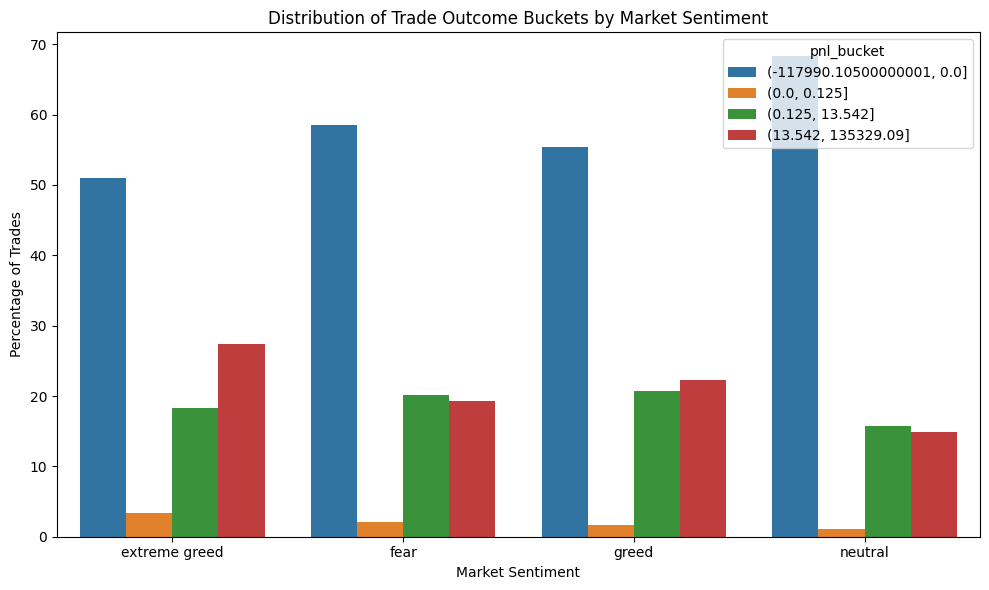

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=bucket_percent, x="classification", y="pct", hue="pnl_bucket")
plt.title("Distribution of Trade Outcome Buckets by Market Sentiment")
plt.ylabel("Percentage of Trades")
plt.xlabel("Market Sentiment")

plt.tight_layout()
plt.savefig("outputs/trade_outcome_buckets_by_sentiment.png", dpi=150)
plt.show()

Observations from the Trade Outcome Distribution

* In all market sentiments, more than half of the trades fall into the loss or zero PnL bucket, meaning most trades are not profitable.

* Greed and Extreme Greed show a higher share of large profitable trades compared to Fear and Neutral.

* Neutral sentiment has the highest percentage of losing trades, indicating weaker performance in calm market conditions.

* Although Fear has the highest number of trades, the percentage of highly profitable trades is not the highest.